# Corte de Malha

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import alinhamento as al

0.007692155975648833
0.4407280727610142


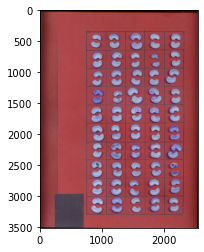

In [4]:
# Abre a imagem original
imagem_original = cv2.imread("original.jpeg")

# Alinha a malha da imagem
imagem_alinhada = al.alinhar(imagem_original)

# Tamanho da imagem
[x, y, z] = np.shape(imagem_alinhada)

plt.imshow(imagem_alinhada)
plt.show()

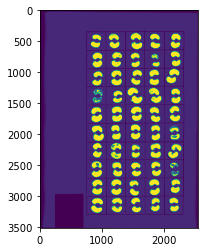

In [6]:
# Faz a segmentacao com thresholding
# Isto é feito para ser mais fácil diferenciar as cores da borda da malha com a cor do papel
(T, imagem_thresh) = cv2.threshold(imagem_alinhada, 115, 255, cv2.THRESH_BINARY)

# Deixa a imagem em escala de cinza
# Para que seja necessario verificar apenas as intensidades de cinza da borda e do papel
imagem_cinza = cv2.cvtColor(imagem_thresh, cv2.COLOR_BGR2GRAY)

plt.imshow(imagem_cinza)
plt.show()

In [7]:
# Prepara para corte

# Definidos pixels iniciais que percorrerao a imagem para encontrar as 4 bordas da malha
# Ponto de busca da borda da malha situado no lado esquerdo da imagem
ponto_medio1 = [int(x*(1/2)), int(y*(2/11))]

# Ponto situado no lado direito da imagem
ponto_medio2 = [int(x*(1/2)), int(y*(11/12))]

# Ponto situado na parte inferior da imagem
ponto_medio3 = [int(x*0.96866), int(y*(1/2))]

# Ponto situado na parte superior da imagem
ponto_medio4 = [int(x*0.03134), int(y*(1/2))]

In [8]:
# Move o ponto de busca 1 a direita ate encontrar a borda da malha
while True:
    # Verifica se pixel possui a cor da borda da malha (0)
    if (imagem_cinza[ponto_medio1[0], ponto_medio1[1]] == 0):
        # Sai do loop com coordenada y na borda da malha
        break

    # Caso pixel nao seja da cor da borda, move pixel na direcao positiva de y
    ponto_medio1[1] = ponto_medio1[1] + 1

# Move o ponto de busca 2 a esquerda ate encontrar a borda da malha
while True:
    # Verifica se pixel possui a cor da borda da malha (0)
    if (imagem_cinza[ponto_medio2[0], ponto_medio2[1]] == 0):
        # Sai do loop com coordenada y na borda da malha
        break

    # Caso pixel nao seja da cor da borda, move pixel na direcao negativa de y
    ponto_medio2[1] = ponto_medio2[1] - 1

# Move o ponto de busca 3 para cima ate encontrar a borda da malha
while True:
    # Verifica se pixel possui a cor da borda da malha (0)
    if (imagem_cinza[ponto_medio3[0], ponto_medio3[1]] == 0 ):
        # Sai do loop com coordenada x na borda da malha
        break

    # Caso pixel nao seja da cor da borda, move pixel na direcao negativa de x
    ponto_medio3[0] = ponto_medio3[0] - 1

# Move o ponto de busca 4 para baixo ate encontrar a borda da malha
while True:
    # Verifica se pixel possui a cor da borda da malha (0)
    if (imagem_cinza[ponto_medio4[0], ponto_medio4[1]] == 0 ):
        # Sai do loop com coordenada x na borda da malha
        break

    # Caso pixel nao seja da cor da borda, move pixel na direcao positiva de x
    ponto_medio4[0] = ponto_medio4[0] + 1

In [9]:
# Coordenadas do vertice inferior esquerdo da malha
coords1 = [ponto_medio3[0], ponto_medio1[1]]
coords2 = [ponto_medio3[0], ponto_medio2[1]]
y_inicial = coords1[1]

# Medidas aproximadas dos lados das secoes
comp_malha = coords2[1] - coords1[1]            # Comprimento da malha
lado_comp = int(comp_malha/5)                   # Comprimento da secao
alt_malha = ponto_medio3[0] - ponto_medio4[0]   # Altura da malha
lado_alt = int(alt_malha/10)                    # Altura da secao


In [10]:
# Define vetor onde sera armazenada cada semente
semente = []

# Popula o vetor com as sementes adequadas, sendo semente[0] a semente 1
for i in range(10):
    for j in range(5):
        semente.append(imagem_alinhada[(coords1[0] - lado_alt):coords1[0], coords1[1]:(coords1[1] + lado_comp)])
        coords1[1] = coords1[1] + lado_comp
    # Prepara para obter as imagens das sementes da linha acima
    coords1[1] = y_inicial
    coords1[0] = coords1[0] - lado_alt
    
# As sementes podem ser posteriormente processadas utilizando a propria array semente[n],
# ou podem ser salvas no sistemas. Exemplo:
# import cv2
# import corte_malha as cm
#
# img = cv2.imread("imagem.jpeg")
# sementes = cm.cortar_malha(img)
# for i in range(50):
#     cv2.imwrite("semente{}.png".format(i+1), sementes[i])

# # Visualização dos cortes

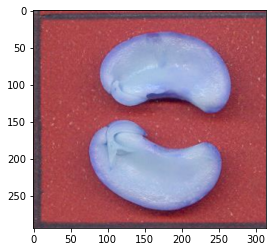

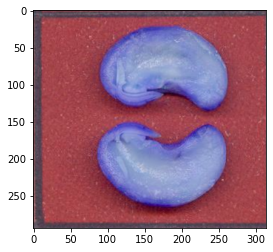

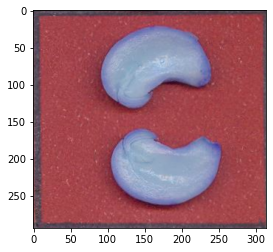

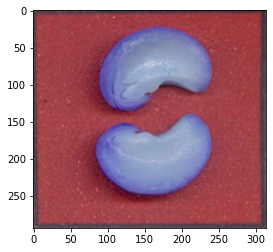

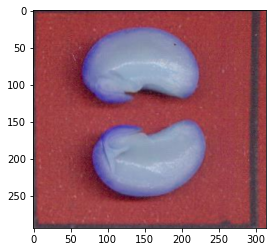

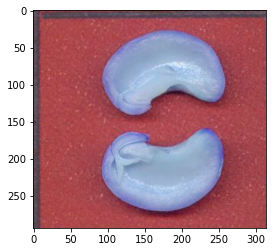

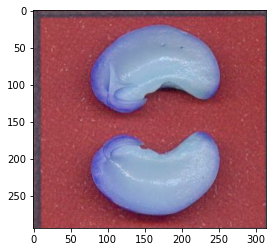

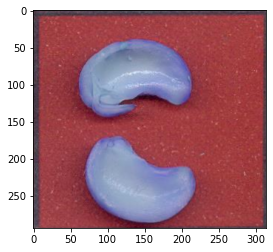

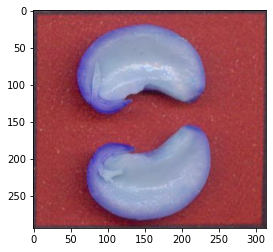

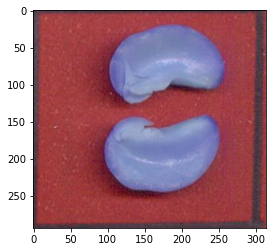

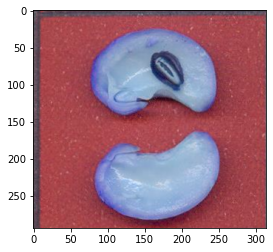

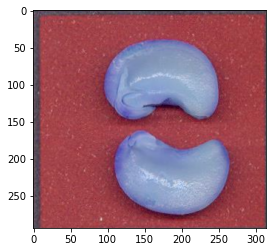

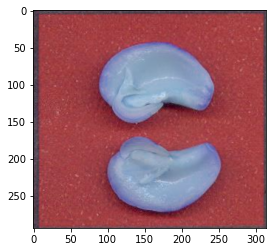

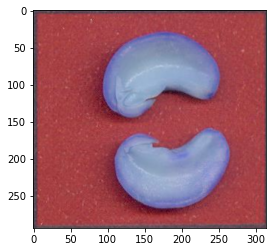

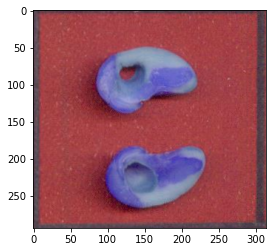

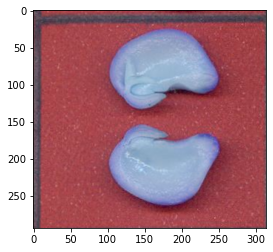

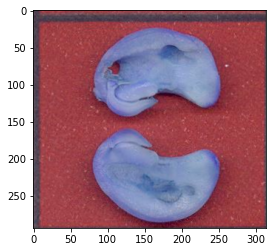

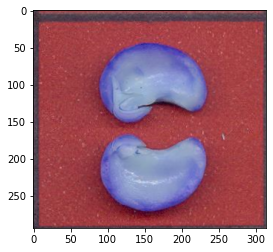

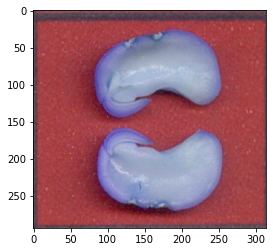

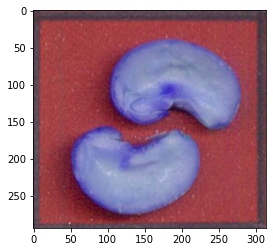

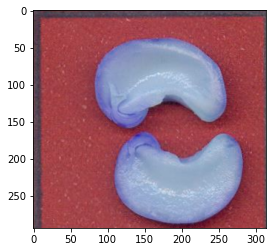

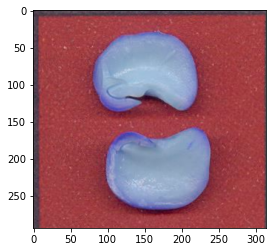

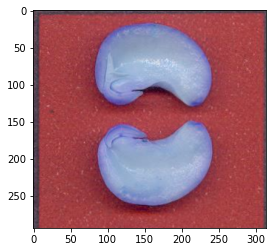

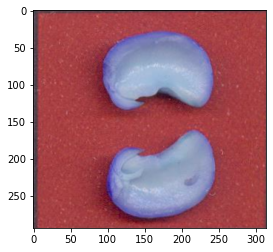

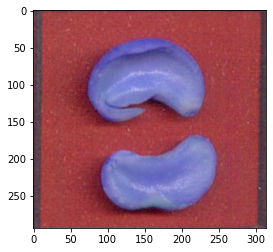

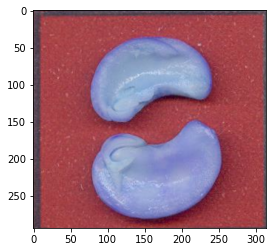

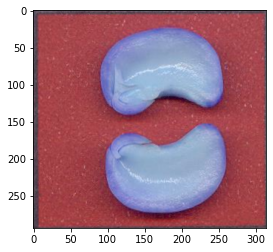

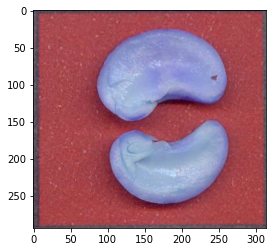

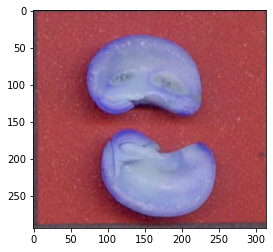

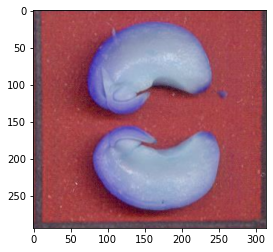

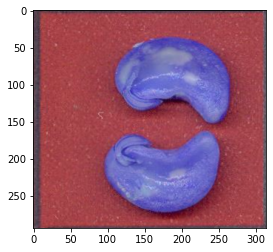

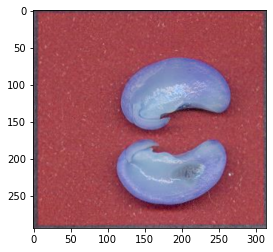

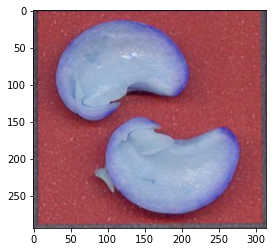

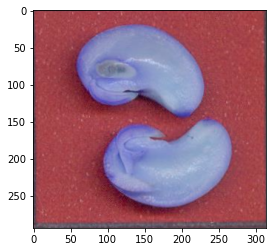

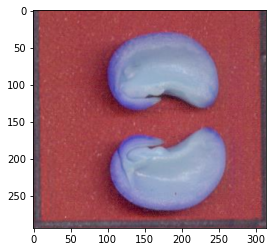

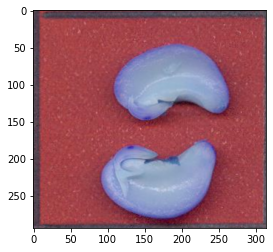

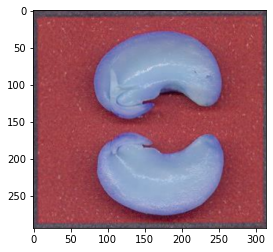

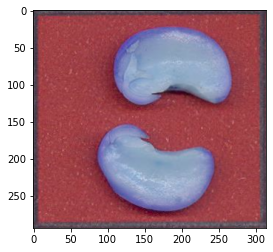

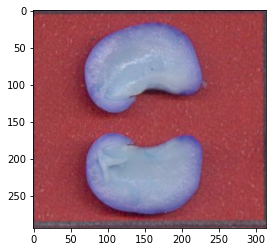

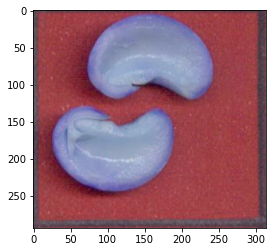

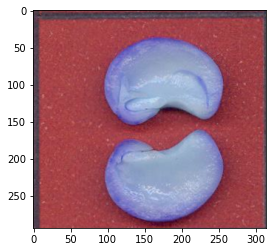

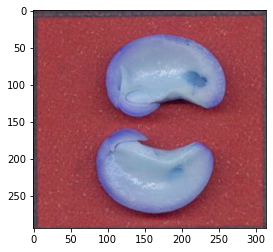

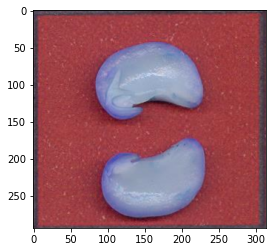

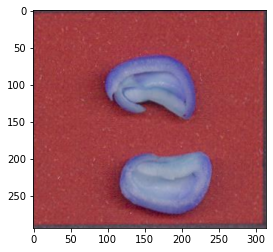

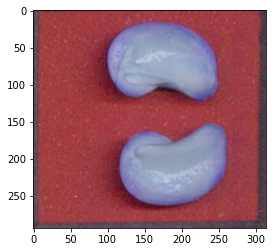

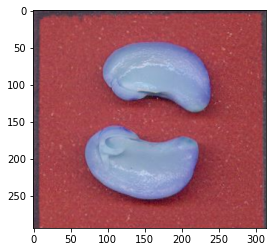

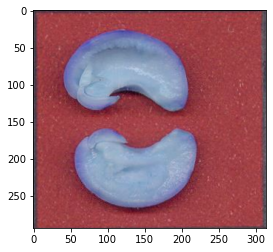

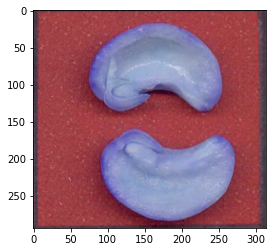

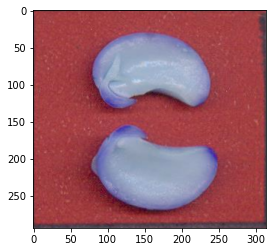

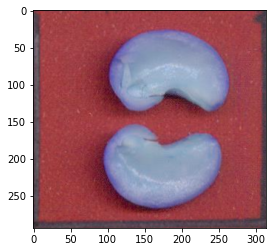

In [15]:
for i in range(50):
    plt.imshow(semente[i])
    plt.show()